<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Supervised_Learning_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Scikit-learn

**Machine Learning**: Subfield of AI, where Machine makes decisions(or prediction) based on data without being explicitly programmed.

**Supervised Learning**: A type of machine learning where machine learns with features and labels or with training examples.

**Unsupervised Learning**: A type of machine learning where machine finds the patterns from without any target varible.

**Classification**: A type problem where model predict from a discrete set of values.

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=0.7)
print(f"top 5 elements of x: \n{X[:5]}")
print(f"top 5 elements of y: \n{y[:5]}")

top 5 elements of x: 
[[-1.92421314  8.22349133]
 [ 5.81426941  1.58565791]
 [ 3.87248628  0.96513407]
 [ 5.00586368  1.57157968]
 [ 4.5135429   4.20834498]]
top 5 elements of y: 
[0 1 1 1 1]


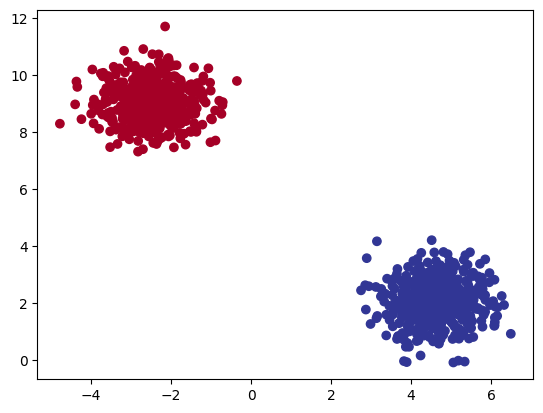

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

# This is our data we will use for classification task

## Notes before training
- Data should no have a missing values.
- Must be in numeric.
- EDA should be performed.

## General way to train a model with sklearn

```
from sklearn.module import Algorithm
model = Algorithm()
model.fit(X, y)
y_dash = model.predict(X_dash)
```

In our case we will use `KNeighborsClassifier`.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(np.array([[0, 4], [1, 6], [4, 0], [1.5, -1.5], [2, 2], [0, 12]]))
print(y_pred)

[1 0 1 1 1 0]


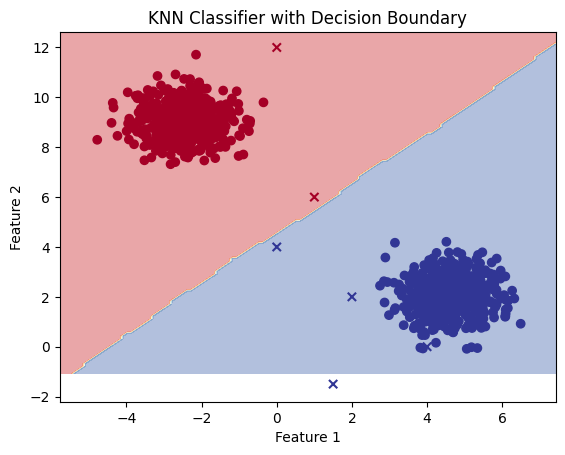

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

plt.scatter([0, 1, 4, 1.5, 2, 0], [4, 6, 0, -1.5, 2, 12], c=y_pred, marker="x", cmap=plt.cm.RdYlBu)
plt.title("KNN Classifier with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Measuring model performance

One of the most common metric for classification model is accuracy.

**accuracy**: *Correct prediction* / *Total observation*

We divide our example into training and testing dataset. In general we take 80% of data for training and 20% for testing, that means If I have a dataset with label and target, then 80% of that data I will give model to train, and when my model is trained and ready to makes guesses, then we give our other 20% of data with features without labels to guess the labels, and then when our model guesses the output, we uses our metrices 'accuracy' which tell us how much label was correct guessed.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 2)
y_train shape: (800,)
X_test shape: (200, 2)
y_test shape: (200,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(f"Acc on test set: {knn.score(X_test, y_test) * 100:.2f}%")

Acc on test set: 100.00%


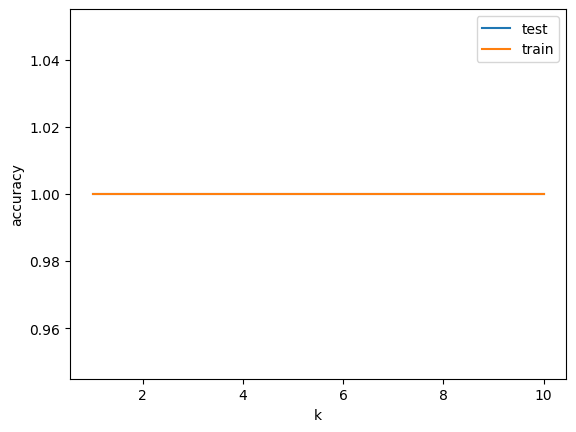

In [ ]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
acc_test, acc_train = {}, {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_test[k] = knn.score(X_test, y_test)
    acc_train[k] = knn.score(X_train, y_train)

plt.plot(ks, list(acc_test.values()), label="test")
plt.plot(ks, list(acc_train.values()), label="train")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

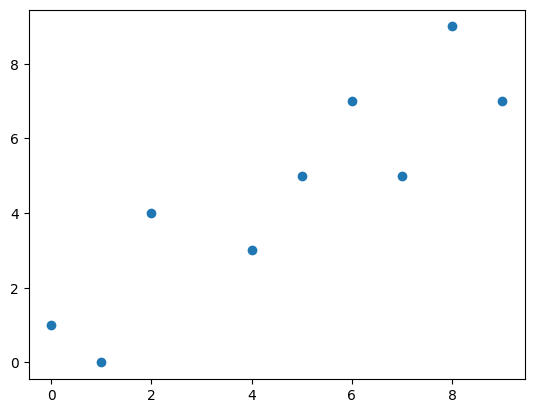

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 4, 5, 6, 7, 8, 9])
y = np.array([1, 0, 4, 3, 5, 7, 5, 9, 7])

plt.scatter(X, y)
plt.show()

slope: [0.82083333] | slope R: [0.82083333]
intercept: 0.7249999999999992 | intercept R: 0.7249999999999992


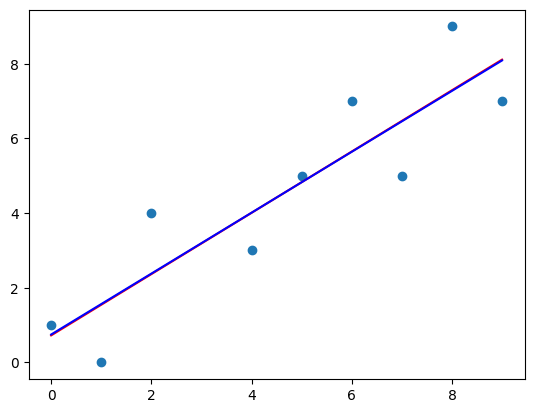

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

model = LinearRegression()
ridge = Ridge(alpha=0.5)

model.fit(X.reshape(-1, 1), y)
ridge.fit(X.reshape(-1, 1), y)

print(f"slope: {model.coef_} | slope R: {model.coef_}")
print(f"intercept: {model.intercept_} | intercept R: {model.intercept_}")

plt.scatter(X, y)
plt.plot(X, model.predict(X.reshape(-1, 1)), color="red")
plt.plot(X, ridge.predict(X.reshape(-1, 1)), color="blue")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X.reshape(-1, 1))
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MSE: {mean_squared_error(y, y_pred)}")
print(f"R^2: {model.score(X.reshape(-1, 1), y)}")

MAE: 1.1416666666666668
MSE: 1.591203703703704
R^2: 0.7900855048859935
